In [31]:
from PCAfold import VQPCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
from matplotlib.colors import ListedColormap
from PCAfold import get_centroids

In [32]:
n_points = 1000
save_filename = None
global_color = '#454545'
k1_color = '#0e7da7'
k2_color = '#ceca70'
color_map = ListedColormap([k1_color, k2_color])


In [33]:
mean_local_1 = [0,1]
mean_local_2 = [6,4]
covariance_local_1 = [[2, 0.5], [0.5, 0.5]]
covariance_local_2 = [[3, 0.3], [0.3, 0.5]]

x_noise_1, y_noise_1 = np.random.multivariate_normal(mean_local_1, covariance_local_1, n_points).T
x_noise_2, y_noise_2 = np.random.multivariate_normal(mean_local_2, covariance_local_2, n_points).T
x_local = np.concatenate([x_noise_1, x_noise_2])
y_local = np.concatenate([y_noise_1, y_noise_2])

Dataset_local = np.hstack((x_local[:,np.newaxis], y_local[:,np.newaxis]))

In [34]:
iris_df = datasets.load_iris(as_frame=True)
iris_df = iris_df.data

In [35]:
# Instantiate VQPCA class object:
vqpca = VQPCA(
    iris_df.to_numpy(),
    n_clusters=5,
    n_components=3,
    scaling='none',
    idx_init='random',
    random_state=42,
    max_iter=100,
    tolerance=1.0e-08,
    verbose=True
)

| It.   | Rec. error      | Error conv.? | Cent. conv.? | Cluster 1  | Cluster 2  | Cluster 3  | Cluster 4  | Cluster 5  | Time [min]   |
| 1     | 0.02026667      | False        | False        | 29         | 15         | 50         | 35         | 21         | 9e-05        |
| 2     | 0.00858338      | False        | False        | 26         | 14         | 50         | 37         | 23         | 0.00016      |
| 3     | 0.00632692      | False        | False        | 25         | 14         | 49         | 42         | 20         | 0.00025      |
| 4     | 0.00499875      | False        | False        | 26         | 11         | 47         | 41         | 25         | 0.00034      |
| 5     | 0.0044734       | False        | False        | 27         | 11         | 45         | 37         | 30         | 0.00046      |
| 6     | 0.00419326      | False        | False        | 27         | 11         | 43         | 35         | 34         | 0.00057      |
| 7     | 0.0038979       | False 

In [36]:
centroids = get_centroids(iris_df.to_numpy(), vqpca.idx)

In [37]:
eigenvectors0 = np.stack((vqpca.A[0][:, 0], vqpca.A[1][:, 0], vqpca.A[2][:, 0], vqpca.A[3][:, 0], vqpca.A[4][:, 0]))
eigenvectors1 = np.stack((vqpca.A[0][:, 1], vqpca.A[1][:, 1], vqpca.A[2][:, 1], vqpca.A[3][:, 1], vqpca.A[4][:, 1]))
eigenvectors2 = np.stack((vqpca.A[0][:, 2], vqpca.A[1][:, 2], vqpca.A[2][:, 2], vqpca.A[3][:, 2], vqpca.A[4][:, 2]))

In [38]:
#eigenvectors0 = np.stack((vqpca.A[0][:, 0], vqpca.A[1][:, 0], vqpca.A[2][:, 0]))
#eigenvectors1 = np.stack((vqpca.A[0][:, 1], vqpca.A[1][:, 1], vqpca.A[2][:, 1]))
#eigenvectors2 = np.stack((vqpca.A[0][:, 2], vqpca.A[1][:, 2], vqpca.A[2][:, 2]))



In [39]:
#eigenvectors0 = np.stack((vqpca.A[0][:, 0], vqpca.A[1][:, 0]))
#eigenvectors1 = np.stack((vqpca.A[0][:, 1], vqpca.A[1][:, 1]))
#eigenvectors2 = np.stack((vqpca.A[0][:, 2], vqpca.A[1][:, 2]))

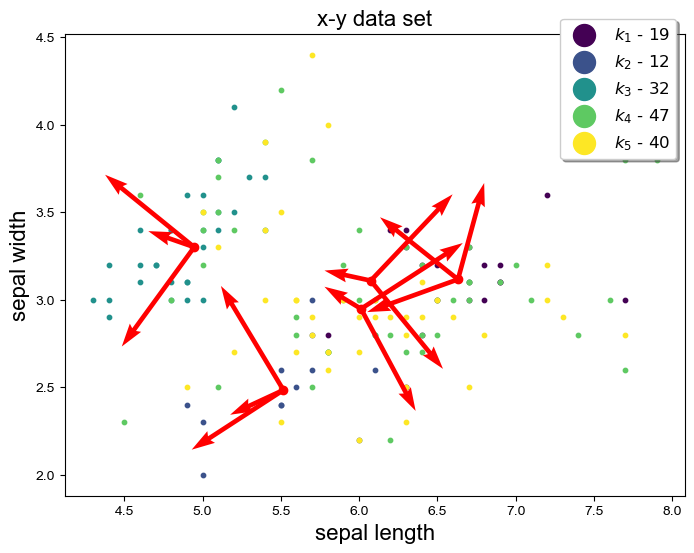

In [40]:
from PCAfold import variable_bins, plot_2d_clustering
import numpy as np

# Plot the clustering result:
plt = plot_2d_clustering(iris_df.to_numpy()[:, 0],
                     iris_df.to_numpy()[:, 1],
                     vqpca.idx,
                     x_label='sepal length',
                     y_label='sepal width',
                     color_map='viridis',
                     first_cluster_index_zero=False,
                     figure_size=(8,6),
                     title='x-y data set',
                     save_filename='clustering.pdf')

plt.scatter(centroids[:, 0], centroids[:, 1], color='red')
plt.quiver(centroids[:, 0], centroids[:, 1], eigenvectors0[:, 0], eigenvectors0[:, 1], color='red', scale=5)
plt.quiver(centroids[:, 0], centroids[:, 1], eigenvectors1[:, 0], eigenvectors1[:, 1], color='red', scale=5)
plt.quiver(centroids[:, 0], centroids[:, 1], eigenvectors2[:, 0], eigenvectors2[:, 1], color='red', scale=5)




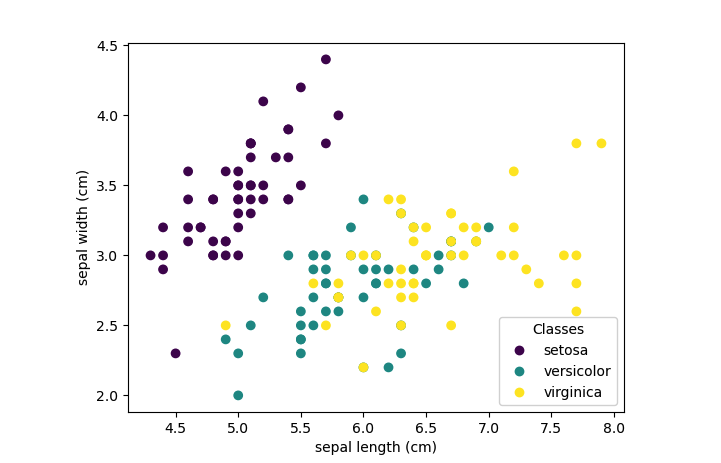

In [41]:
print(vqpca.principal_components[0].shape)
print(vqpca.A[0].shape)

(19, 3)
(4, 3)


In [42]:
# reconstruction
reconstructed_Data_1 = vqpca.principal_components[0] @ np.transpose(vqpca.A[0]) + (centroids[0])
reconstructed_Data_2 = vqpca.principal_components[1] @ np.transpose(vqpca.A[1]) + (centroids[1])
reconstructed_Data_3 = vqpca.principal_components[2] @ np.transpose(vqpca.A[2]) + (centroids[2])
reconstructed_Data_4 = vqpca.principal_components[3] @ np.transpose(vqpca.A[3]) + (centroids[3])
reconstructed_Data_5 = vqpca.principal_components[4] @ np.transpose(vqpca.A[4]) + (centroids[4])

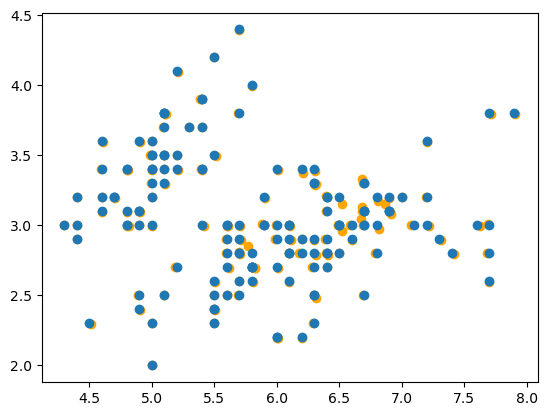

In [43]:
plt.scatter(reconstructed_Data_1[:, 0], reconstructed_Data_1[:, 1], color='orange')
plt.scatter(reconstructed_Data_2[:, 0], reconstructed_Data_2[:, 1], color='orange')
plt.scatter(reconstructed_Data_3[:, 0], reconstructed_Data_3[:, 1], color='orange')
plt.scatter(reconstructed_Data_4[:, 0], reconstructed_Data_4[:, 1], color='orange')
plt.scatter(reconstructed_Data_5[:, 0], reconstructed_Data_5[:, 1], color='orange')
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])


In [44]:
print(vqpca.global_mean_squared_reconstruction_error)

0.003201227584987124
